In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from data_preprocessing import load_data, handle_outliers, preprocess_data
from model_building import build_model

In [3]:
# Load data
file_path = 'https://github.com/pedrogasparotti/challenges/raw/main/cars_train.csv'
df = load_data(file_path)

In [4]:
print(df.describe())

                 id     num_fotos  ano_de_fabricacao    ano_modelo  \
count  2.958400e+04  29407.000000       29584.000000  29584.000000   
mean   1.705650e+38     10.323834        2016.758552   2017.808985   
std    9.814219e+37      3.487334           4.062422      2.673930   
min    1.332600e+34      8.000000        1985.000000   1997.000000   
25%    8.617510e+37      8.000000        2015.000000   2016.000000   
50%    1.706530e+38      8.000000        2018.000000   2018.000000   
75%    2.554710e+38     14.000000        2019.000000   2020.000000   
max    3.402560e+38     21.000000        2022.000000   2023.000000   

           hodometro    num_portas  veiculo_alienado         preco  
count   29584.000000  29584.000000               0.0  2.958400e+04  
mean    58430.592077      3.940677               NaN  1.330239e+05  
std     32561.769309      0.338360               NaN  8.166287e+04  
min       100.000000      2.000000               NaN  9.869951e+03  
25%     31214.000000    

In [5]:
df.tail()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
29579,4.098510e+37,8.0,TOYOTA,HILUX,2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO,2021,2021,8150,Automática,4,...,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,403015.28960
29580,1.646630e+38,8.0,VOLKSWAGEN,POLO,1.0 200 TSI HIGHLINE AUTOMÁTICO,2020,2020,17987,Automática,4,...,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,88978.08050
29581,1.708660e+38,8.0,TOYOTA,HILUX,2.8 SRX 4X4 CD 16V DIESEL 4P AUTOMÁTICO,2019,2019,44742,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218807.64870
29582,2.089100e+38,8.0,PEUGEOT,2008,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,2021,2022,35376,Automática,4,...,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,68495.99069
29583,1.717810e+38,14.0,AUDI,Q7,3.0 TFSI AMBIENTE V6 24V GASOLINA 4P TIPTRONIC,2016,2017,90433,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132507.87320


In [6]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'id' in numerical_features:
    numerical_features.remove('id')
    
if 'veiculo_alienado' in numerical_features:
    numerical_features.remove('veiculo_alienado')

In [7]:
correlation_matrix = df[numerical_features].corr()

print(correlation_matrix)

                   num_fotos  ano_de_fabricacao  ano_modelo  hodometro  \
num_fotos           1.000000           0.029702    0.032821   0.027550   
ano_de_fabricacao   0.029702           1.000000    0.860315  -0.728288   
ano_modelo          0.032821           0.860315    1.000000  -0.790062   
hodometro           0.027550          -0.728288   -0.790062   1.000000   
num_portas          0.011245           0.080988    0.074566  -0.055628   
preco              -0.032331           0.239172    0.214854  -0.359218   

                   num_portas     preco  
num_fotos            0.011245 -0.032331  
ano_de_fabricacao    0.080988  0.239172  
ano_modelo           0.074566  0.214854  
hodometro           -0.055628 -0.359218  
num_portas           1.000000 -0.075265  
preco               -0.075265  1.000000  


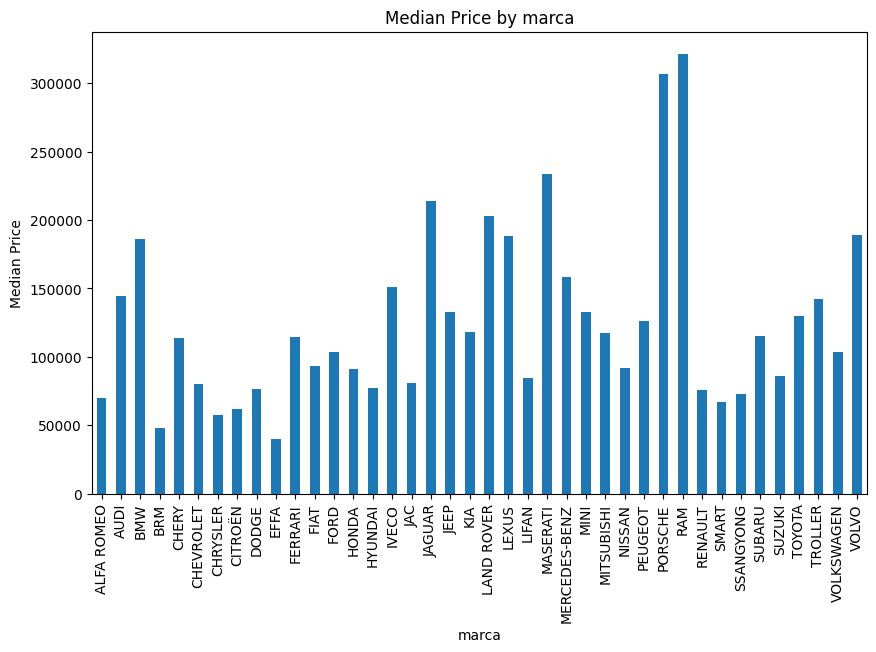

                        mean         median  count
marca                                             
ALFA ROMEO      68172.543196   69926.750040      9
AUDI           159977.750342  144563.336800   1698
BMW            200501.186503  186290.870700   1784
BRM             47762.671070   47762.671070      1
CHERY          121716.542251  113645.340600    153
CHEVROLET       93187.683964   79934.798235   3020
CHRYSLER        62569.784568   57530.513200     30
CITROËN         73494.483671   61708.494395    194
DODGE           74370.666723   76463.935140     37
EFFA            40163.175830   40163.175830      1
FERRARI        114439.236300  114439.236300      1
FIAT            99711.164582   93202.070185   1918
FORD           127453.062260  103619.716000   1060
HONDA          100620.715073   91506.027175   1586
HYUNDAI         84419.639626   77118.762160   2043
IVECO          151197.557200  151197.557200      2
JAC             94387.618707   80714.531750      3
JAGUAR         220195.137180  2

In [8]:
# Visualize the distribution of prices for the most relevant categorical feature
categorical_features = ['marca']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['preco'].median().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Median Price')
    plt.title(f'Median Price by {feature}')
    plt.show()

# Calculate summary statistics for each categorical feature
summary_statistics = df.groupby(categorical_features)['preco'].agg(['mean', 'median', 'count'])
print(summary_statistics)

In [9]:
# Convert the result into a pandas DataFrame
summary_statistics_df = summary_statistics.reset_index()
summary_statistics_df.tail()

,marca,mean,median,count
35,SUZUKI,92604.776441,85950.32873,41
36,TOYOTA,156195.160143,129875.16495,2180
37,TROLLER,148570.646836,142571.03890,177
38,VOLKSWAGEN,117940.087380,103350.09210,4594
39,VOLVO,198797.855656,189347.38770,287


In [10]:
# find out the median of all values

from data_preprocessing import handle_outliers

df = handle_outliers(df)

average_price = df['preco'].mean()
average_sample = summary_statistics_df['count'].mean()

print("Average Price of Cars:", average_price)
print("Average Sample Size:", average_sample)

Average Price of Cars: 127953.77215722327
Average Sample Size: 739.6


In [11]:
# Filter by average, and eliminate samples with a small count

filtered_classes = summary_statistics_df[summary_statistics_df['mean'] < average_price]
filtered_classes = filtered_classes[summary_statistics_df['count'] > average_sample]

# Display the filtered DataFrame
print(filtered_classes)

         marca           mean         median  count
5    CHEVROLET   93187.683964   79934.798235   3020
11        FIAT   99711.164582   93202.070185   1918
12        FORD  127453.062260  103619.716000   1060
13       HONDA  100620.715073   91506.027175   1586
14     HYUNDAI   84419.639626   77118.762160   2043
28     PEUGEOT  122797.835087  126420.198200   1675
38  VOLKSWAGEN  117940.087380  103350.092100   4594


C:\Users\pedro\AppData\Local\Temp\ipykernel_3336\4045667584.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_classes = filtered_classes[summary_statistics_df['count'] > average_sample]


In [12]:
marcas_populares = ["CHEVROLET", "FIAT", "HONDA", "HYUNDAI", "PEUGEOT", "VOLKSWAGEN"]

In [13]:
# Filter dataframe to only contain instances with the 'marcas_populares'
df_marcas_populares = df[df['marca'].isin(marcas_populares)]

In [14]:
average_prices = df_marcas_populares.groupby('estado_vendedor')['preco'].mean()

# Print the average prices
print(average_prices)

print("State with highest average_price is: ", average_prices.idxmax())

estado_vendedor
Acre (AC)                    76202.462150
Alagoas (AL)                115331.244507
Amazonas (AM)                85600.767352
Bahia (BA)                  103447.392531
Ceará (CE)                  101979.092115
Espírito Santo (ES)          96095.233233
Goiás (GO)                  123758.202319
Maranhão (MA)               121041.689124
Mato Grosso (MT)            131479.497304
Mato Grosso do Sul (MS)      91542.079854
Minas Gerais (MG)           107704.792704
Paraná (PR)                 113901.198370
Paraíba (PB)                 91066.777475
Pará (PA)                   117677.240212
Pernambuco (PE)              97301.329251
Piauí (PI)                  166998.772860
Rio Grande do Norte (RN)    109105.107498
Rio Grande do Sul (RS)      112557.620134
Rio de Janeiro (RJ)         105487.336505
Rondônia (RO)               118363.820725
Roraima (RR)                 63613.691190
Santa Catarina (SC)         101415.867566
Sergipe (SE)                108353.825845
São Paulo (SP)    

In [15]:
# Filter the DataFrame to contain only instances where 'tipo' is 'Picape' and 'cambio' is 'Automático'
picape_df = df[(df['tipo'] == 'Picape') & (df['cambio'] == 'Automática')]

In [16]:
average_price_picape = picape_df.groupby('estado_vendedor')['preco'].mean()

# Print the average prices
print(average_price_picape)

print("State with lowest average_price is: ", average_price_picape.idxmin())

estado_vendedor
Acre (AC)                   145256.693662
Alagoas (AL)                218671.542767
Bahia (BA)                  202882.410829
Goiás (GO)                  194187.767032
Mato Grosso (MT)            214102.315650
Mato Grosso do Sul (MS)     144700.247632
Minas Gerais (MG)           182478.099817
Paraná (PR)                 187135.816974
Paraíba (PB)                 93157.035253
Pernambuco (PE)             192566.764506
Piauí (PI)                  208181.077750
Rio Grande do Norte (RN)    179961.694800
Rio Grande do Sul (RS)      185793.382208
Rio de Janeiro (RJ)         176548.816583
Santa Catarina (SC)         172079.930955
Sergipe (SE)                272649.517750
São Paulo (SP)              174376.094274
Tocantins (TO)              187717.127533
Name: preco, dtype: float64
State with lowest average_price is:  Paraíba (PB)


In [17]:
# Filter the DataFrame to contain only instances where 'garantia_de_fábrica' is 'Garantia de fábrica'
garantia_df = df[(df['garantia_de_fábrica'] == 'Garantia de fábrica')]

In [18]:
average_price_garantia = garantia_df.groupby('estado_vendedor')['preco'].mean()

# Print the average prices
print(average_price_garantia)

print("State with lowest average_price is: ", average_price_garantia.idxmin())

estado_vendedor
Acre (AC)                   150416.911340
Alagoas (AL)                154268.676542
Amazonas (AM)                99617.303340
Bahia (BA)                  165221.236195
Ceará (CE)                  123939.878800
Espírito Santo (ES)         104030.208124
Goiás (GO)                  161709.106729
Mato Grosso (MT)            197657.066550
Mato Grosso do Sul (MS)     121709.589842
Minas Gerais (MG)           157531.959478
Paraná (PR)                 170214.863647
Paraíba (PB)                 95762.746630
Pará (PA)                    98156.615279
Pernambuco (PE)             149898.416932
Rio Grande do Norte (RN)    133120.393897
Rio Grande do Sul (RS)      169001.736437
Rio de Janeiro (RJ)         174742.392511
Santa Catarina (SC)         163290.559023
Sergipe (SE)                318314.436800
São Paulo (SP)              161694.077183
Tocantins (TO)              243002.217000
Name: preco, dtype: float64
State with lowest average_price is:  Paraíba (PB)
